In [412]:
import pandas as pd
import matplotlib.pyplot as plt

In [413]:
df=pd.read_csv("titanic.csv")

In [414]:
df_row,df_col=df.shape
print(f'There are total numbers of {df_row} rows and {df_col} columns')

There are total numbers of 1309 rows and 28 columns


In [415]:
# Inspecting the data
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [416]:
# lets remove unwanted columns
selected_columns=["Passengerid","Age","Fare","Sex","Parch","sibsp","Pclass","Embarked","2urvived"]
df=df[selected_columns]

# Renaming the column
df.columns=["PassengerId","Age","Fare","Sex","Parch","SibSp","Pclass","Embarked","Survived"]

In [417]:
df.head()

,PassengerId,Age,Fare,Sex,Parch,SibSp,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,0,1,3,2.0,0
1,2,38.0,71.2833,1,0,1,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,0,1,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   Parch        1309 non-null   int64  
 5   SibSp        1309 non-null   int64  
 6   Pclass       1309 non-null   int64  
 7   Embarked     1307 non-null   float64
 8   Survived     1309 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.2 KB


In [419]:
# Checking for missing values
print(df.isna().sum())

# Filling the missing values
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

df.head()

PassengerId    0
Age            0
Fare           0
Sex            0
Parch          0
SibSp          0
Pclass         0
Embarked       2
Survived       0
dtype: int64


,PassengerId,Age,Fare,Sex,Parch,SibSp,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,0,1,3,2.0,0
1,2,38.0,71.2833,1,0,1,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,0,1,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


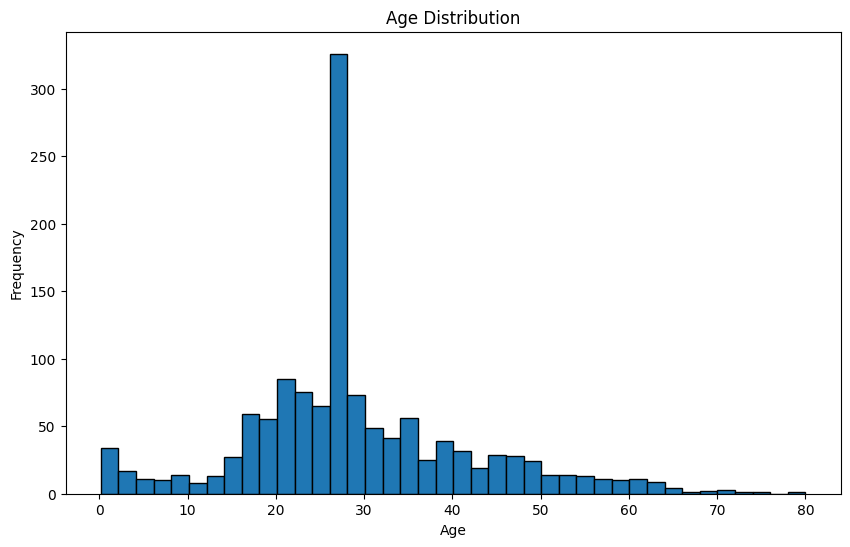

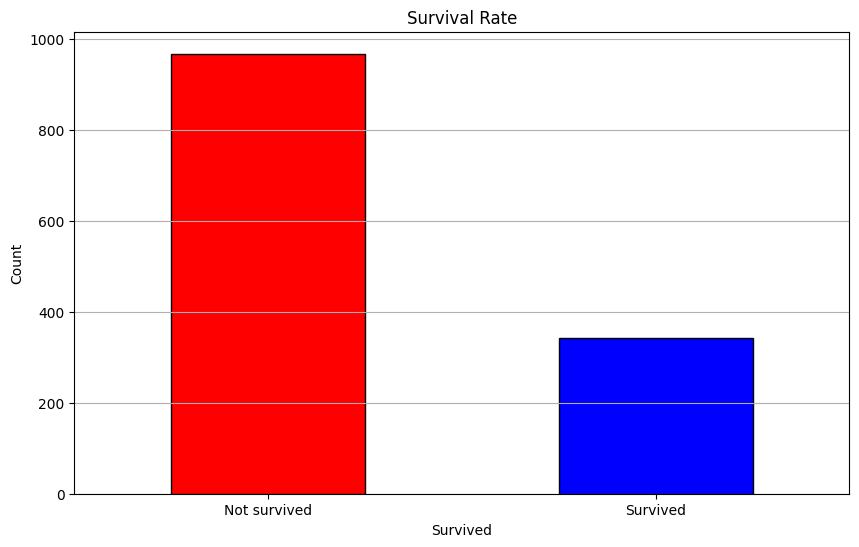

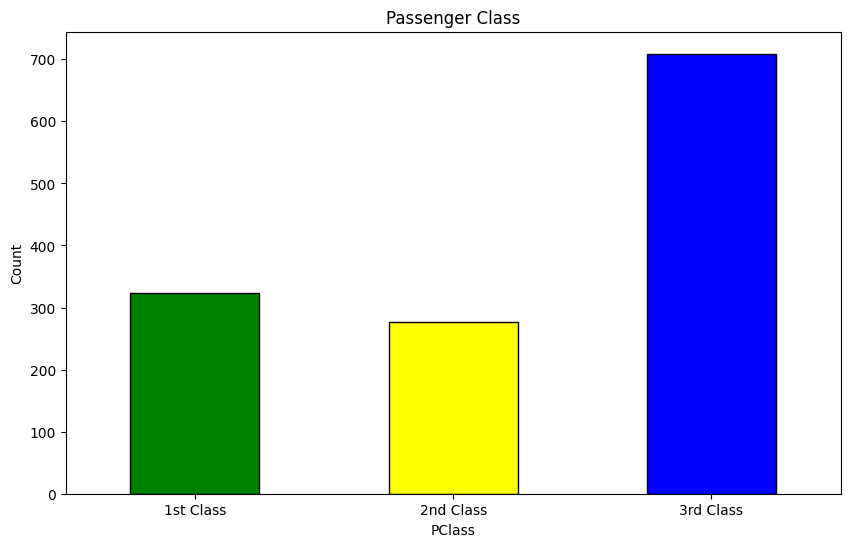

In [420]:
# EDA

# Age Distribution
plt.figure(figsize=(10, 6))
plt.hist(df["Age"],bins=40,edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig('age_distribution.png')
plt.show()

# Survival Rate
plt.figure(figsize=(10, 6))
df["Survived"].value_counts().plot(kind="bar",color=["red","blue"],edgecolor="black")
plt.xticks([0,1],["Not survived","Survived"],rotation=0)
plt.title("Survival Rate")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.grid(axis="y")
plt.savefig('survival_rate.png')
plt.show()

# Passenger Class
plt.figure(figsize=(10, 6))
df["Pclass"].value_counts().sort_index().plot(kind="bar",color=["green","yellow","blue"],edgecolor="black")
plt.xticks([0,1,2],["1st Class","2nd Class", "3rd Class"],rotation=0)
plt.title("Passenger Class")
plt.xlabel("PClass")
plt.ylabel("Count")
plt.savefig('passenger_class_distribution.png')
plt.show()

In [421]:
# Convert Sex from numeric to string
df["Sex"]=df["Sex"].map({0:"Male",1:"Female"})

# Convert Embarked from numeric to string
df["Embarked"]=df["Embarked"].map({0.0:"C",1.0:"Q",2.0:"S"})

# Creating a new Column: FamilySize
df["FamilySize"]=df["Parch"]+df["SibSp"]+1


df.head()

,PassengerId,Age,Fare,Sex,Parch,SibSp,Pclass,Embarked,Survived,FamilySize
0,1,22.0,7.2500,Male,0,1,3,S,0,2
1,2,38.0,71.2833,Female,0,1,1,C,1,2
2,3,26.0,7.9250,Female,0,0,3,S,1,1
3,4,35.0,53.1000,Female,0,1,1,S,1,2
4,5,35.0,8.0500,Male,0,0,3,S,0,1


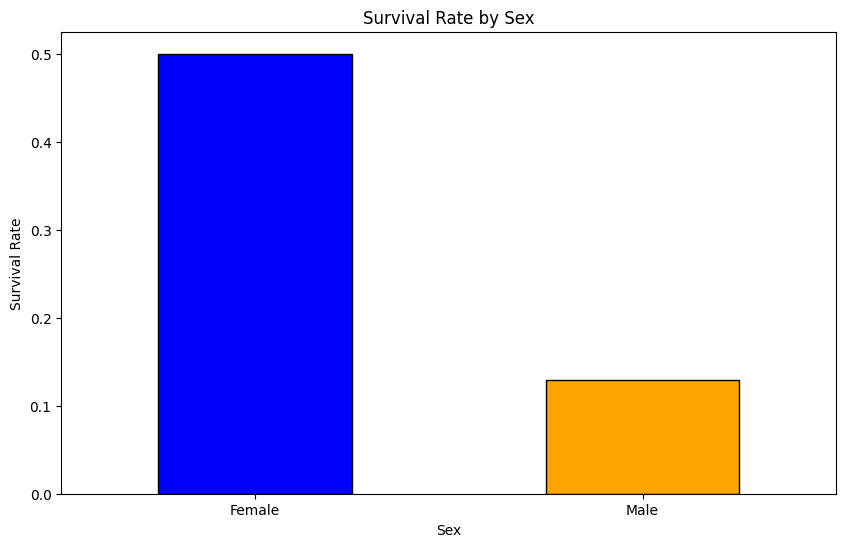

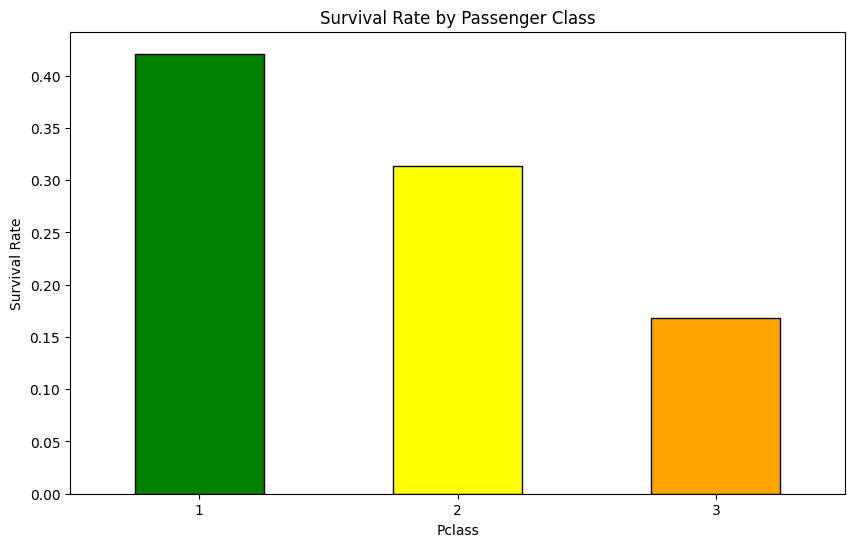

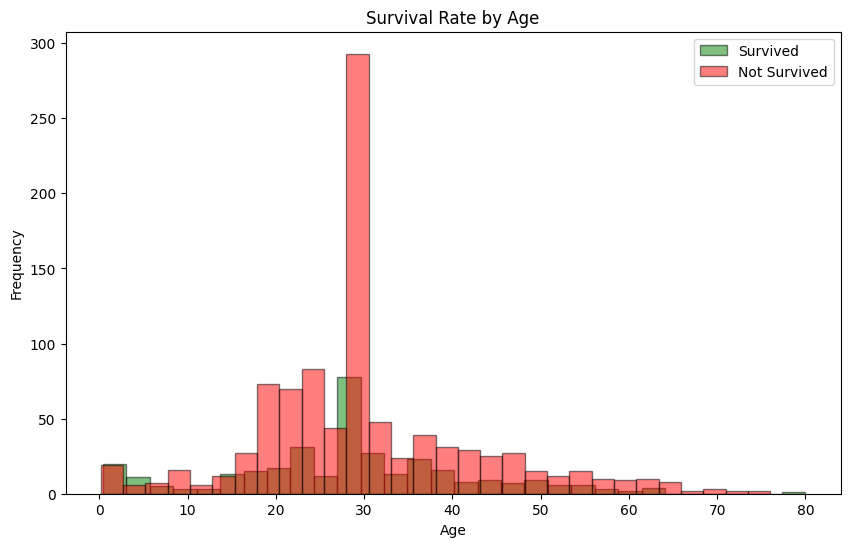

In [422]:
# Data Visualization
# Grouping by sex and calculating the mean survival rate
survival_by_sex=df.groupby("Sex")["Survived"].mean()

# Grouping by Pclass and calculating the mean survival rate
survival_by_pclass=df.groupby("Pclass")["Survived"].mean()






# Survival by Sex plot
plt.figure(figsize=(10, 6))
survival_by_sex.plot(kind="bar",color=["blue","orange"],edgecolor="black")
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.savefig("survival_rate_by_sex.png")
plt.show()

# Survival Rate by Passenger Class
plt.figure(figsize=(10, 6))
survival_by_pclass.plot(kind="bar",color=["green","yellow","orange"],edgecolor="black")
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.savefig("survival_rate_by_pclass.png")
plt.show()


# Survival Rate by Age
plt.figure(figsize=(10, 6))
plt.hist(df[df["Survived"]==1]["Age"],bins=30, alpha=0.5, color='green', label='Survived', edgecolor='black')
plt.hist(df[df["Survived"]==0]["Age"],bins=30, alpha=0.5, color='red', label='Not Survived', edgecolor='black')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.savefig("survival_rate_by_age.png")
plt.show()


# Titanic Data Analysis

## Introduction
In this analysis, I have explored the titanic dataset to understand the factors affecting the survival rate of passengers.

## Data Cleaning
- Removed unnecessary columns.
- Renamed the column names appropriately.
- Handled missing values in Embarked.

## Exploratory Data Analysis
### Age Distribution

![Age Distribution](age_distribution.png)

### Survival Rate

![Survival Rate](survival_rate.png)

### Passenger Class Distribution

![Passenger Class Distribution](passenger_class_distribution.png)


## Feature Engineering
- Converted the Columns 'Sex' and 'Embarked' from numerical to string.
- Create a new Column 'FamilySize'.


## Data Visualization
### Survival Rate by Sex

![Survival Rate by Sex](survival_rate_by_sex.png)

### Survival Rate by Passenger Class 

![Survival Rate by Passenger Class](survival_rate_by_pclass.png)

### Survival Rate by Age

![Survival Rate by Age](survival_rate_by_age.png)


## Conclusion
- **Sex**: Females had a highest survival rate than males.
- **Pclass**: Passengers in the higher class (1st class) had a higher survival rate.
- **Age**: Younger passengers had a slightly higher survival rate.